In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 556s 3us/step
Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")


Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)


In [5]:
def fire_module(x, squeeze_channels, expand_channels):
    squeeze = layers.Conv2D(squeeze_channels, (1, 1), activation='relu', padding='valid')(x)
    expand1x1 = layers.Conv2D(expand_channels, (1, 1), activation='relu', padding='valid')(squeeze)
    expand3x3 = layers.Conv2D(expand_channels, (3, 3), activation='relu', padding='same')(squeeze)
    return layers.Concatenate()([expand1x1, expand3x3])

In [6]:
def build_squeezenet(input_shape=(32, 32, 3), num_classes=10):
    input_img = layers.Input(shape=input_shape)

    x = layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = fire_module(x, 16, 64)
    x = fire_module(x, 16, 64)
    x = fire_module(x, 32, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = fire_module(x, 32, 128)
    x = fire_module(x, 48, 192)
    x = fire_module(x, 48, 192)
    x = fire_module(x, 64, 256)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = fire_module(x, 64, 256)
    x = layers.Dropout(0.5)(x)

    x = layers.Conv2D(num_classes, (1, 1), activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    output = layers.Activation('softmax')(x)

    model = models.Model(inputs=input_img, outputs=output, name='SqueezeNet_Custom')
    return model

model = build_squeezenet()
model.summary()

Model: "SqueezeNet_Custom"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      2,688 │ input_layer_1[0]… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │      1,552 │ max_pooling2d_1[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │      1,088 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │      9,280 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_3[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │      2,064 │ concatenate[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │      1,088 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │      9,280 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 16, 16,    │          0 │ conv2d_6[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │      4,128 │ concatenate_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │      4,224 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │     36,992 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 16, 16,    │          0 │ conv2d_9[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 256) │          0 │ concatenate_2[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 8, 8, 32)  │      8,224 │ max_pooling2d_2[

 Total params: 729,034 (2.78 MB)

 Trainable params: 729,034 (2.78 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20
625/625 - 71s - 114ms/step - accuracy: 0.1001 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 2/20
625/625 - 55s - 88ms/step - accuracy: 0.0990 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 3/20
625/625 - 55s - 88ms/step - accuracy: 0.0992 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 4/20
625/625 - 55s - 88ms/step - accuracy: 0.0997 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 5/20
625/625 - 55s - 88ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 6/20
625/625 - 55s - 88ms/step - accuracy: 0.0996 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 7/20
625/625 - 82s - 132ms/step - accuracy: 0.0997 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 8/20
625/625 - 54s - 87ms/step - accuracy: 0.0997 - loss: 2.3026 - val_accuracy: 0.1014 - val_loss: 2.3026
Epoch 9/20
625/625 - 55s - 88ms/step - accuracy: 0.0996 - loss: 2.3026 - val_accuracy: 0.1014 

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.1001 - loss: 2.3026
Test Accuracy: 0.1000


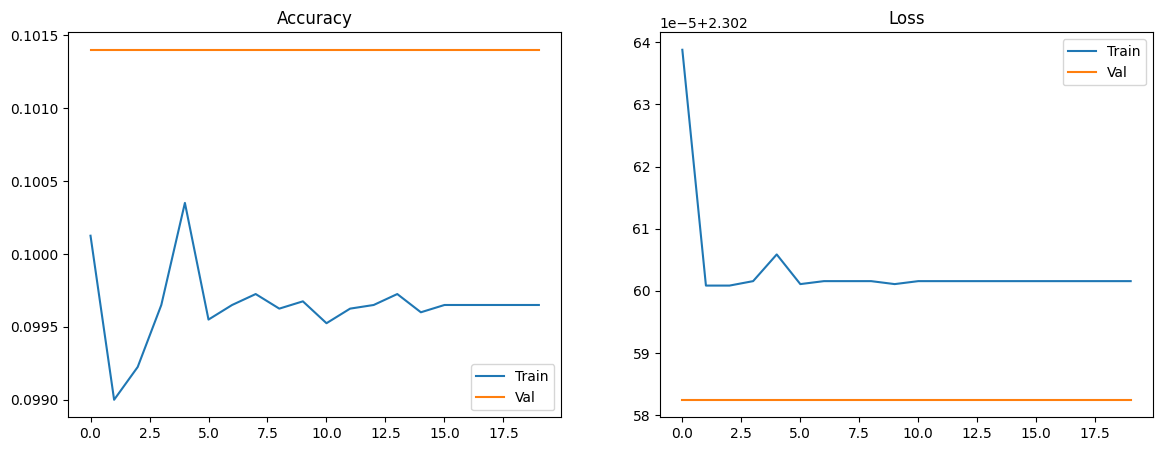

In [10]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.show()